In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
routes_schema = {
         'airline' : 0,
         'airline_id' : 1,
         'source_airport' : 2,
         'source_airport_id' : 3,
         'destination_airport' : 4,
         'destination_airport_id' : 5,
         'codeshare' : 6,
         'stops' : 7,
         'equipment' : 8
         }

In [3]:
routes_schema.keys()

['source_airport_id',
 'codeshare',
 'airline',
 'destination_airport_id',
 'equipment',
 'airline_id',
 'source_airport',
 'destination_airport',
 'stops']

In [16]:
columns = ['airline', 'airline_id', 'source_airport', 'source_airport_id', 'destination_airport', 'destination_airport_id', 'codeshare', 'stop', 'equipment']

In [17]:
routes = pd.read_csv('routes.dat')

In [18]:
routes.head()

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [19]:
routes.columns = columns

In [20]:
routes.head()

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [21]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 9 columns):
airline                   67662 non-null object
airline_id                67662 non-null object
source_airport            67662 non-null object
source_airport_id         67662 non-null object
destination_airport       67662 non-null object
destination_airport_id    67662 non-null object
codeshare                 14597 non-null object
stop                      67662 non-null int64
equipment                 67644 non-null object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [22]:
routes.stop.unique()

array([0, 1])

In [29]:
routes[
    (routes['source_airport'] == 'BOG')
    &
    (routes['destination_airport'] == 'JFK')
]

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment
12333,AV,515,BOG,2709,JFK,3797,NaN,0,319 330
20327,DL,2009,BOG,2709,JFK,3797,NaN,0,73W
55867,UA,5209,BOG,2709,JFK,3797,Y,0,330
58662,US,5265,BOG,2709,JFK,3797,NaN,0,330


In [30]:
routes[routes['stop'] == 1]

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment
2065,5T,1623,YRT,132,YEK,50,NaN,1,ATR
7809,AC,330,ABJ,253,BRU,302,NaN,1,333
8271,AC,330,YVR,156,YBL,30,NaN,1,BEH
17766,CU,1936,FCO,1555,HAV,1909,NaN,1,767
25115,FL,1316,HOU,3566,SAT,3621,NaN,1,735
25219,FL,1316,MCO,3878,HOU,3566,NaN,1,73W
25229,FL,1316,MCO,3878,ORF,3611,NaN,1,717
49745,SK,4319,ARN,737,GEV,715,NaN,1,ATP
63566,WN,4547,BOS,3448,MCO,3878,NaN,1,73W
64041,WN,4547,MCO,3878,BOS,3448,NaN,1,73W


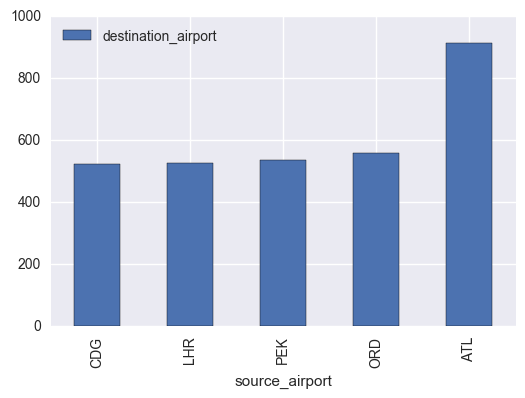

In [9]:
routes.groupby('source_airport').agg(
    {
        'destination_airport' : 'count'
    }
).sort_values('destination_airport').tail().reset_index().plot(x='source_airport', y='destination_airport', kind='bar')

In [31]:
pd.read_csv('airports.dat').head()

,1,Goroka,Goroka.1,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
0,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
2,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
4,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby


In [32]:
routes[routes['airline_id'] == '24'].head()

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment
4654,AA,24,ABE,4355,CLT,3876,Y,0,CR9 CR7 CRJ
4655,AA,24,ABE,4355,PHL,3752,NaN,0,DH3
4656,AA,24,ABI,3718,DFW,3670,Y,0,ERD ER4 CRJ
4657,AA,24,ABQ,4019,DFW,3670,NaN,0,M83 M80
4658,AA,24,ABQ,4019,LAX,3484,Y,0,CR7 CRJ


In [33]:
aa = routes[routes['airline_id'] == '24']


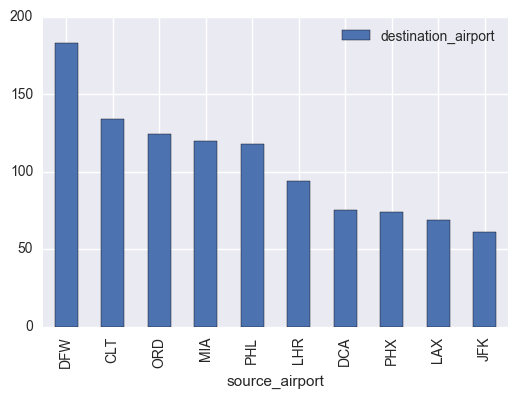

In [34]:
aa.groupby('source_airport').agg(
    {
        'destination_airport' : 'count'
    }
).reset_index().sort_values('destination_airport', ascending=False).head(10).plot(x='source_airport', y='destination_airport', kind='bar')

In [35]:
routes[routes['airline_id'] == '5289']

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment


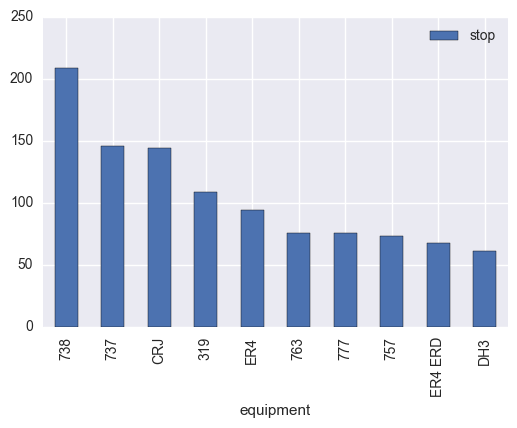

In [36]:
aa.groupby('equipment').agg(
    {
        'stop' : 'count'
    }
).sort_values('stop', ascending=False).reset_index().head(10).plot(x='equipment', y='stop', kind='bar')

In [37]:
aa[aa['equipment'] == '777']

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stop,equipment
4699,AA,24,ATL,3682,LHR,507,Y,0,777
4711,AA,24,AUH,2179,JFK,3797,Y,0,777
4713,AA,24,AUH,2179,LHR,507,Y,0,777
4714,AA,24,AUH,2179,MCT,2194,Y,0,777
4715,AA,24,AUH,2179,ORD,3830,Y,0,777
4729,AA,24,BAH,2057,DOH,11051,Y,0,777
4730,AA,24,BAH,2057,LHR,507,Y,0,777
4763,AA,24,BLR,3131,LHR,507,Y,0,777
4788,AA,24,BOM,2997,LHR,507,Y,0,777
5149,AA,24,DEL,3093,LHR,507,Y,0,777


In [17]:
# which routes use which aircrafts?
# is aircraft correlated with price?
# 

In [18]:
import plotly.graph_objs as go

In [19]:
dir(go)

['AngularAxis',
 'Annotation',
 'Annotations',
 'Area',
 'Bar',
 'Box',
 'Candlestick',
 'Choropleth',
 'ColorBar',
 'Contour',
 'Contours',
 'Data',
 'ErrorX',
 'ErrorY',
 'ErrorZ',
 'Figure',
 'Font',
 'Frames',
 'Heatmap',
 'Heatmapgl',
 'Histogram',
 'Histogram2d',
 'Histogram2dContour',
 'Histogram2dcontour',
 'Layout',
 'Legend',
 'Line',
 'Margin',
 'Marker',
 'Mesh3d',
 'Ohlc',
 'Pie',
 'Pointcloud',
 'RadialAxis',
 'Scatter',
 'Scatter3d',
 'Scattergeo',
 'Scattergl',
 'Scattermapbox',
 'Scatterternary',
 'Scene',
 'Stream',
 'Surface',
 'Trace',
 'XAxis',
 'XBins',
 'YAxis',
 'YBins',
 'ZAxis',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'absolute_import',
 'graph_objs',
 'graph_objs_tools']

In [20]:
print go.Choropleth.__doc__


    Valid attributes for 'choropleth' at path [] under parents ():
    
        ['autocolorscale', 'colorbar', 'colorscale', 'geo', 'hoverinfo',
        'legendgroup', 'locationmode', 'locations', 'locationssrc', 'marker',
        'name', 'opacity', 'reversescale', 'showlegend', 'showscale', 'stream',
        'text', 'textsrc', 'type', 'uid', 'visible', 'z', 'zauto', 'zmax',
        'zmin', 'zsrc']
    
    Run `<choropleth-object>.help('attribute')` on any of the above.
    '<choropleth-object>' is the object at []

    


In [21]:
go.Choropleth(
    locations=[(-5.207083, 145.788700)]
)

{'locations': [(-5.207083, 145.7887)], 'type': 'choropleth'}

In [35]:
from plotly.offline import init_notebook_mode, iplot

In [36]:
init_notebook_mode(connected=True)

In [48]:
data = [go.Choropleth(
    locations=[(-5.207083, 145.788700)]
)]

iplot(data)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline

In [44]:
init_notebook_mode(connected=True)

In [27]:
aa.head()

,airline,airline_id,source_airport,source_airport_id,destination_airport,destnation_airport_id,codeshare,stop,equipment
4654,AA,24,ABE,4355,CLT,3876,Y,0,CR9 CR7 CRJ
4655,AA,24,ABE,4355,PHL,3752,NaN,0,DH3
4656,AA,24,ABI,3718,DFW,3670,Y,0,ERD ER4 CRJ
4657,AA,24,ABQ,4019,DFW,3670,NaN,0,M83 M80
4658,AA,24,ABQ,4019,LAX,3484,Y,0,CR7 CRJ


In [39]:
airports = pd.read_csv('airports.dat')
airports.head(2)

,1,Goroka,Goroka.1,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
0,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby


In [40]:
 airport_schema = {
         'airport_id' : 0,
         'name' : 1,
         'city' : 2,
         'country': 3,
         'iata/faa' : 4,
         'icao': 5,
         'latitude' : 6,
         'longitude' : 7,
         'altitude' : 8,
         'timezone' : 9,
         'dst' : 10,
         'tz_database' : 11
         }

In [41]:
airports.columns = ['airport_id', 'name', 'city', 'country', 'iata/faa', 'icao', 'latitude', 'longitude', 'altitude', 'timezone', 'dst', 'tz_database']

In [42]:
airports.head()

,airport_id,name,city,country,iata/faa,icao,latitude,longitude,altitude,timezone,dst,tz_database
0,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
2,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
4,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby


In [32]:
airports.values

array([[2, 'Madang', 'Madang', ..., 10.0, 'U', 'Pacific/Port_Moresby'],
       [3, 'Mount Hagen', 'Mount Hagen', ..., 10.0, 'U',
        'Pacific/Port_Moresby'],
       [4, 'Nadzab', 'Nadzab', ..., 10.0, 'U', 'Pacific/Port_Moresby'],
       ..., 
       [9539, 'Sullivan Bay Water Aerodrome', 'Sullivan Bay', ..., -8.0,
        'A', 'America/Vancouver'],
       [9540, 'Deer Harbor Seaplane', 'Deer Harbor', ..., -8.0, 'A',
        'America/Los_Angeles'],
       [9541, 'San Diego Old Town Transit Center', 'San Diego', ..., -8.0,
        'A', 'America/Los_Angeles']], dtype=object)

In [46]:
scatters = [
    go.Scattergeo(
        lon = row[6],
        lat = row[7],
        text = row[2],
        mode = 'text',
        showlegend = False,
        geo = 'geo2'
    )
    for row in airports.values[0:100]
]

In [47]:
data = [go.Choropleth(

    #showcountries=True,
    #lat=airports.latitude,
    #lon=airports.longitude,
    #mode='markers'
)]

layout = go.Layout(
    title='world airports',
    geo2 = dict(
            scope = 'world',
            showframe = True,
            showland = True,
            landcolor = "rgb(229, 229, 229)",
            showcountries = True,
            domain = dict(
                x = [ 0, 0.6 ],
                y = [ 0, 0.6 ]
            ),
            bgcolor = 'rgba(255, 255, 255, 0.0)',
        )
    )


fig = go.Figure(data=scatters, layout=layout)

iplot(fig)